<a href="https://colab.research.google.com/github/josuelopes512/naive-bayes/blob/master/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [24]:
class Bayes_Classifier:
    def __init__(self, outlook, temp, humidity, windy, play_golf):
        self.carrega_tabela("naive_bayes_classificador.csv")
        self.outlook = self.probability_select_class(outlook, 'Target', play_golf)[1]
        self.temp = self.probability_select_class(temp, 'Target', play_golf)[1]
        self.humidity = self.probability_select_class(humidity, 'Target', play_golf)[1]
        self.windy = self.probability_select_class(windy, 'Target', play_golf)[1]
        self.play_golf = self.calculate_prior('Target')[0][play_golf]

    def carrega_tabela(self, tabela):
        self.csv = pd.read_csv(tabela, sep=',')

    def view_table(self):
      return self.csv

    def likehood(self, coluna):
      tabela = self.csv
      total_target_total = len(tabela[coluna])
      labels = sorted(list(tabela[coluna].unique()))
      likelihoodx = None
      likelihoodx = [1]*len(labels)
      return likelihoodx

    # def probability_select(self, prob_nome_coluna, label, prob_target, value_target ):
    #     tabela = self.csv
    #     tabelax = tabela[tabela[prob_nome_coluna]==label]
    #     k = tabelax[prob_target]
    #     x = tabela[tabela[prob_target]==value_target]
    #     calc = len(tabelax[k==value_target])/len(x) if len(tabelax[k==value_target]) != 0 else (len(tabelax[k==value_target]) + 1)/(len(x) + 3)
    #     return (tabelax, calc, len(tabelax[k==value_target]), len(x))
    
    def probability_select_class(self, label, prob_target, value_target):
        tabela = self.csv
        prob_nome_coluna = None
        for i in list(tabela.columns):
          if label in sorted(list(tabela[i].unique())):
            prob_nome_coluna = i
        tabelax = tabela[tabela[prob_nome_coluna]==label]
        k = tabelax[prob_target]
        x = tabela[tabela[prob_target]==value_target]
        calc = len(tabelax[k==value_target])/len(x) if len(tabelax[k==value_target]) != 0 else (len(tabelax[k==value_target]) + 1)/(len(x) + 3)
        return (tabelax, calc, len(tabelax[k==value_target]), len(x))

    def calculate_prior(self, Y):
        tabela = self.csv
        classes = sorted(list(tabela[Y].unique()))
        new_dic = dict()
        for i in classes:
          new_dic.update({
              i: len(tabela[tabela[Y]==i])/len(tabela)
        })
        return new_dic, tabela
    
    def result_probability(self):
      print("Genero", self.outlook)
      print("Idade", self.temp)
      print("Escolaridade", self.humidity)
      print("Profissao", self.windy)
      print("Target", self.play_golf)

      return (self.outlook*self.temp*self.humidity*self.windy*self.play_golf)


In [25]:
def calc_probability(genero, idade, escolaridade, profissao):
  yes = Bayes_Classifier(genero, idade, escolaridade, profissao,1).result_probability()
  print("TOTAL YES:", yes)
  print('\n')
  no = Bayes_Classifier(genero, idade, escolaridade, profissao,0).result_probability()
  print("TOTAL NO:", no)
  print('\n')
  def prob(a, b):
    return a/(b+a)
  return "YES: {}".format(prob(yes, no)), "NO: {}".format(prob(no, yes))

In [26]:
print(calc_probability("F","a - Ate 25 anos","Fundamental","b"))

Genero 0.6036269430051814
Idade 0.15025906735751296
Escolaridade 0.4896373056994819
Profissao 0.4430051813471503
Target 0.772
TOTAL YES: 0.015188326021062291


Genero 0.5131578947368421
Idade 0.40350877192982454
Escolaridade 0.5394736842105263
Profissao 0.35526315789473684
Target 0.228
TOTAL NO: 0.009048139306021287


('YES: 0.6266724877612313', 'NO: 0.37332751223876864')


Index(['genero', 'idade', 'escolaridade', 'profissao', 'target'], dtype='object')
AxesSubplot(0.125,0.125;0.775x0.755)


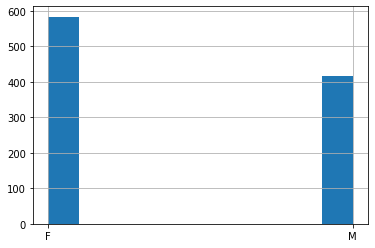

In [ ]:
print(a.view_table().columns)
print(a.csv['genero'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


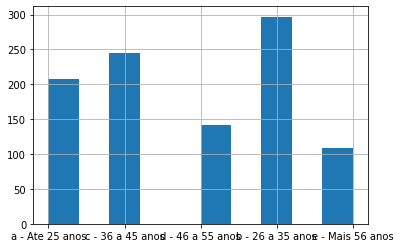

In [ ]:
print(a.csv['idade'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


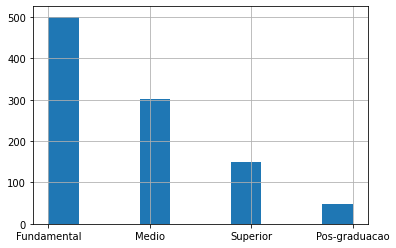

In [ ]:
print(a.csv['escolaridade'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


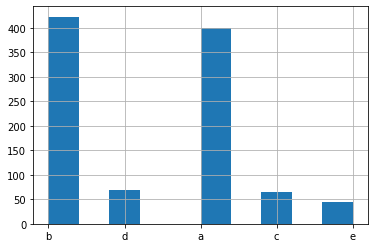

In [ ]:
print(a.csv['profissao'].hist())